# Abalone Classification

In [1]:
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
abalone = fetch_ucirepo(id=1) 
X = abalone.data.features 
y = abalone.data.targets 

In [3]:
print(X)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [4]:
print(y)

      Rings
0        15
1         7
2         9
3        10
4         7
...     ...
4172     11
4173     10
4174      9
4175     10
4176     12

[4177 rows x 1 columns]


#### Pre-processing of data

In [5]:
label_encoder = LabelEncoder()
if 'Sex' in X.columns:  # Ensure column name is correct
    X['Sex'] = label_encoder.fit_transform(X['Sex'])

C:\Users\randa\AppData\Local\Temp\ipykernel_19276\3566664418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values.flatten()
y_test = y_test.values.flatten() 

#### Unsupervised K-Means Clustering Model

In [8]:
kmeans = KMeans()
kmeans_labels_train = kmeans.fit_predict(X_train_scaled)

Mapping of label to clusters (Using most common label in cluster)

In [9]:
cluster_to_label = {}
for cluster in np.unique(kmeans_labels_train):
    cluster_indices = np.where(kmeans_labels_train == cluster)[0]  # Find the indices of the current cluster
    most_common_label = np.bincount(y_train[cluster_indices]).argmax()  # Get the most common label
    cluster_to_label[cluster] = most_common_label # Label each cluster

kmeans_labels_train_mapped = np.array([cluster_to_label[label] for label in kmeans_labels_train])

In [10]:
kmeans_labels_test = kmeans.predict(X_test_scaled)
kmeans_labels_test_mapped = np.array([cluster_to_label[label] for label in kmeans_labels_test])

In [11]:
correct_predictions = np.sum(kmeans_labels_test_mapped == y_test)
total_predictions = len(y_test)

model_accuracy = correct_predictions / total_predictions
print(f"Accuracy: {model_accuracy:.4f}")

Accuracy: 0.2679


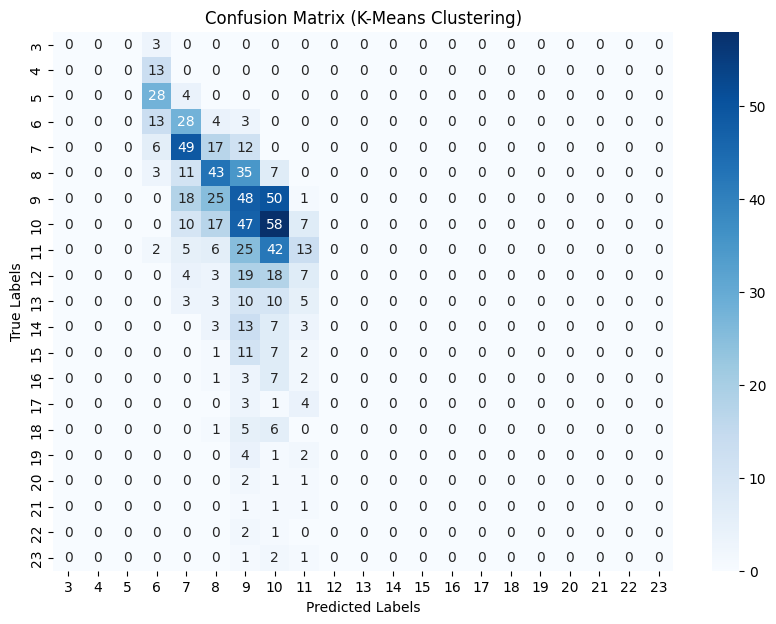

In [12]:
confusion_matrix1 = confusion_matrix(y_test, kmeans_labels_test_mapped)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (K-Means Clustering)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [13]:
report = classification_report(y_test, kmeans_labels_test_mapped, target_names=[f"Class {label}" for label in np.unique(y_test)])
print("Classification Report (K-Means Clustering):")
print(report)

Classification Report (K-Means Clustering):
              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        13
     Class 5       0.00      0.00      0.00        32
     Class 6       0.19      0.27      0.22        48
     Class 7       0.37      0.58      0.45        84
     Class 8       0.35      0.43      0.39        99
     Class 9       0.20      0.34      0.25       142
    Class 10       0.26      0.42      0.32       139
    Class 11       0.27      0.14      0.18        93
    Class 12       0.00      0.00      0.00        51
    Class 13       0.00      0.00      0.00        31
    Class 14       0.00      0.00      0.00        26
    Class 15       0.00      0.00      0.00        21
    Class 16       0.00      0.00      0.00        13
    Class 17       0.00      0.00      0.00         8
    Class 18       0.00      0.00      0.00        12
    Class 19       0.00      0.00    

c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Supervised Logistic Regression Classification Model

In [14]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = log_reg_model.predict(X_test_scaled)

In [16]:
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)

model_accuracy = correct_predictions / total_predictions 
print(f"Logistic Regression Accuracy: {model_accuracy:.4f}")

Logistic Regression Accuracy: 0.2751


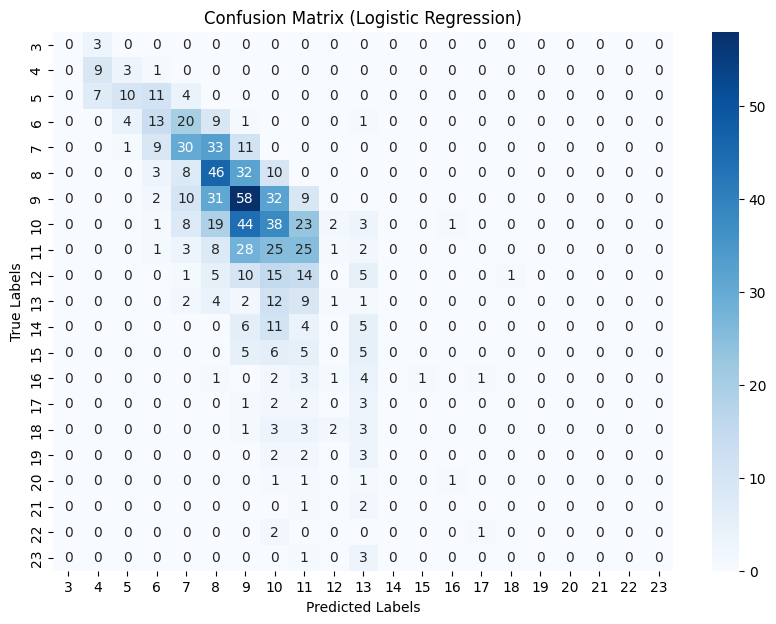

In [17]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
report = classification_report(y_test, kmeans_labels_test_mapped, target_names=[f"Class {label}" for label in np.unique(y_test)])
print("Classification Report (Logistic Regresssion):")
print(report)

Classification Report (Logistic Regresssion):
              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         3
     Class 4       0.00      0.00      0.00        13
     Class 5       0.00      0.00      0.00        32
     Class 6       0.19      0.27      0.22        48
     Class 7       0.37      0.58      0.45        84
     Class 8       0.35      0.43      0.39        99
     Class 9       0.20      0.34      0.25       142
    Class 10       0.26      0.42      0.32       139
    Class 11       0.27      0.14      0.18        93
    Class 12       0.00      0.00      0.00        51
    Class 13       0.00      0.00      0.00        31
    Class 14       0.00      0.00      0.00        26
    Class 15       0.00      0.00      0.00        21
    Class 16       0.00      0.00      0.00        13
    Class 17       0.00      0.00      0.00         8
    Class 18       0.00      0.00      0.00        12
    Class 19       0.00      0.00  

c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo